In [56]:
<a href="https://colab.research.google.com/github/Aadhil21/DSGP-Group28/blob/branch-Aadhil/Analyze_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

SyntaxError: invalid syntax (1021595565.py, line 1)

# Import Libraries


In [57]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import math

In [58]:
video_name = 'WPushUp.mp4'
video_path = 'Videos/' + video_name
dataset_name = 'pose_landmark_data_' + video_name.split('.')[0] + '.xlsx'
dataset_path = 'Datasets/'

##Read keypoints data

In [59]:
df = pd.read_excel(dataset_path + dataset_name)

##Remove z keypoints

In [60]:
for i in df.columns:
    if i.split('_')[-1] == 'z':
        df.drop(i, axis=1, inplace=True)

In [61]:
df.head()

,Frame_Number,NOSE_Point_x,NOSE_Point_y,NOSE_visibility,LEFT_EYE_INNER_Point_x,LEFT_EYE_INNER_Point_y,LEFT_EYE_INNER_visibility,LEFT_EYE_Point_x,LEFT_EYE_Point_y,LEFT_EYE_visibility,...,LEFT_HEEL_visibility,RIGHT_HEEL_Point_x,RIGHT_HEEL_Point_y,RIGHT_HEEL_visibility,LEFT_FOOT_INDEX_Point_x,LEFT_FOOT_INDEX_Point_y,LEFT_FOOT_INDEX_visibility,RIGHT_FOOT_INDEX_Point_x,RIGHT_FOOT_INDEX_Point_y,RIGHT_FOOT_INDEX_visibility
0,1,0.254621,0.302891,0.999914,0.249138,0.278250,0.999861,0.250954,0.276175,0.999864,...,0.349857,0.928891,0.421936,0.055152,0.934912,0.507480,0.258004,0.920347,0.474278,0.035637
1,2,0.255304,0.302962,0.999917,0.249683,0.278400,0.999866,0.251444,0.276316,0.999870,...,0.353081,0.937154,0.429419,0.057414,0.937241,0.508591,0.262736,0.933384,0.473314,0.037212
2,3,0.255342,0.306269,0.999911,0.250044,0.280966,0.999859,0.251828,0.278884,0.999862,...,0.346095,0.937662,0.429229,0.055038,0.939340,0.505883,0.256015,0.935431,0.469985,0.035728
3,4,0.251655,0.308809,0.999917,0.247719,0.285840,0.999869,0.249826,0.283820,0.999871,...,0.338052,0.918101,0.424698,0.052821,0.915376,0.534277,0.253592,0.913949,0.472692,0.034842
4,5,0.247827,0.312926,0.999909,0.244061,0.291691,0.999864,0.246229,0.289719,0.999865,...,0.317119,0.415372,0.374898,0.052662,0.304477,0.342846,0.239753,0.344384,0.346067,0.034747


##Get column name

In [62]:
num = 0
for i in range(len(df.columns[1:])):
    if i != 0 and i % 2 != 0:
        num += 1
        print(num, df.columns[i], df.columns[i + 1])

1 NOSE_Point_x NOSE_Point_y
2 NOSE_visibility LEFT_EYE_INNER_Point_x
3 LEFT_EYE_INNER_Point_y LEFT_EYE_INNER_visibility
4 LEFT_EYE_Point_x LEFT_EYE_Point_y
5 LEFT_EYE_visibility LEFT_EYE_OUTER_Point_x
6 LEFT_EYE_OUTER_Point_y LEFT_EYE_OUTER_visibility
7 RIGHT_EYE_INNER_Point_x RIGHT_EYE_INNER_Point_y
8 RIGHT_EYE_INNER_visibility RIGHT_EYE_Point_x
9 RIGHT_EYE_Point_y RIGHT_EYE_visibility
10 RIGHT_EYE_OUTER_Point_x RIGHT_EYE_OUTER_Point_y
11 RIGHT_EYE_OUTER_visibility LEFT_EAR_Point_x
12 LEFT_EAR_Point_y LEFT_EAR_visibility
13 RIGHT_EAR_Point_x RIGHT_EAR_Point_y
14 RIGHT_EAR_visibility MOUTH_LEFT_Point_x
15 MOUTH_LEFT_Point_y MOUTH_LEFT_visibility
16 MOUTH_RIGHT_Point_x MOUTH_RIGHT_Point_y
17 MOUTH_RIGHT_visibility LEFT_SHOULDER_Point_x
18 LEFT_SHOULDER_Point_y LEFT_SHOULDER_visibility
19 RIGHT_SHOULDER_Point_x RIGHT_SHOULDER_Point_y
20 RIGHT_SHOULDER_visibility LEFT_ELBOW_Point_x
21 LEFT_ELBOW_Point_y LEFT_ELBOW_visibility
22 RIGHT_ELBOW_Point_x RIGHT_ELBOW_Point_y
23 RIGHT_ELBOW_visibi

##Calculate angle function

In [63]:
# Assuming df is your DataFrame
def calculate_angle(row):
    import math
    row = abs(row)

    # Accessing columns by their index positions (0 to 5) from the row
    radians = math.atan2(row[5] - row[3], row[4] - row[2]) - math.atan2(row[1] - row[3], row[0] - row[2])
    angle = math.degrees(radians)
    if angle < 0:
        angle += 360
    return angle

In [64]:
# def calculate_angle(row):
#     # Check if row contains at least 6 keypoints (assuming x, y coordinates)
#     if len(row) < 6:
#         raise ValueError("Row should contain at least 6 keypoints (x, y coordinates)")
# 
#     # Accessing keypoints by their names (assuming specific columns in the DataFrame)
#     x0, y0, x1, y1, x2, y2 = row[:6]  # Assuming the first 6 columns contain x, y coordinates
# 
#     # Calculate angles between vectors
#     radians = math.atan2(y2 - y1, x2 - x1) - math.atan2(y0 - y1, x0 - x1)
#     angle = math.degrees(radians)
# 
#     # Adjust angle to be within [0, 360) degrees
#     angle %= 360
# 
#     return angle

##New dataframe for angles

In [65]:
Angles_df = pd.DataFrame()
Angles_df['Frame_Number'] = df['Frame_Number']
Angles_df

,Frame_Number
0,1
1,2
2,3
3,4
4,5
...,...
222,246
223,248
224,249
225,250


##Generate angles from keypoints

In [66]:
Angle_At_Right_Elbow = df[[
    'RIGHT_WRIST_Point_x', 'RIGHT_WRIST_Point_y',
    'RIGHT_ELBOW_Point_x', 'RIGHT_ELBOW_Point_y',
    'RIGHT_SHOULDER_Point_x', 'RIGHT_SHOULDER_Point_y']]

Angles_df['Angle_At_Right_Elbow'] = Angle_At_Right_Elbow.apply(calculate_angle, axis=1)

Angle_At_Left_Elbow = df[[
    'LEFT_WRIST_Point_x', 'LEFT_WRIST_Point_y',
    'LEFT_ELBOW_Point_x', 'LEFT_ELBOW_Point_y',
    'LEFT_SHOULDER_Point_x', 'LEFT_SHOULDER_Point_y']]
Angles_df['Angle_At_Left_Elbow'] = Angle_At_Left_Elbow.apply(calculate_angle, axis=1)

# Calculate angle at right shoulder
Angle_At_Right_Shoulder = df[[
    'RIGHT_ELBOW_Point_x', 'RIGHT_ELBOW_Point_y',
    'RIGHT_SHOULDER_Point_x', 'RIGHT_SHOULDER_Point_y',
    'RIGHT_HIP_Point_x', 'RIGHT_HIP_Point_y'
]]
Angles_df['Angle_At_Right_Shoulder'] = Angle_At_Right_Shoulder.apply(calculate_angle, axis=1)

# Calculate angle at left shoulder
Angle_At_Left_Shoulder = df[[
    'LEFT_ELBOW_Point_x', 'LEFT_ELBOW_Point_y',
    'LEFT_SHOULDER_Point_x', 'LEFT_SHOULDER_Point_y',
    'LEFT_HIP_Point_x', 'LEFT_HIP_Point_y'
]]
Angles_df['Angle_At_Left_Shoulder'] = Angle_At_Left_Shoulder.apply(calculate_angle, axis=1)

# Calculate angle at right knee (example)
Angle_At_Right_Knee = df[[
    'RIGHT_HIP_Point_x', 'RIGHT_HIP_Point_y',
    'RIGHT_KNEE_Point_x', 'RIGHT_KNEE_Point_y',
    'RIGHT_ANKLE_Point_x', 'RIGHT_ANKLE_Point_y'
]]
Angles_df['Angle_At_Right_Knee'] = Angle_At_Right_Knee.apply(calculate_angle, axis=1)

# Calculate angle at left knee (example)
Angle_At_Left_Knee = df[[
    'LEFT_HIP_Point_x', 'LEFT_HIP_Point_y',
    'LEFT_KNEE_Point_x', 'LEFT_KNEE_Point_y',
    'LEFT_ANKLE_Point_x', 'LEFT_ANKLE_Point_y'
]]
Angles_df['Angle_At_Left_Knee'] = Angle_At_Left_Knee.apply(calculate_angle, axis=1)

# Calculate angle at right hip
Angle_At_Right_Hip = df[[
    'RIGHT_SHOULDER_Point_x', 'RIGHT_SHOULDER_Point_y',
    'RIGHT_HIP_Point_x', 'RIGHT_HIP_Point_y',
    'RIGHT_KNEE_Point_x', 'RIGHT_KNEE_Point_y'
]]
Angles_df['Angle_At_Right_Hip'] = Angle_At_Right_Hip.apply(calculate_angle, axis=1)

# Calculate angle at left hip
Angle_At_Left_Hip = df[[
    'LEFT_SHOULDER_Point_x', 'LEFT_SHOULDER_Point_y',
    'LEFT_HIP_Point_x', 'LEFT_HIP_Point_y',
    'LEFT_KNEE_Point_x', 'LEFT_KNEE_Point_y'
]]
Angles_df['Angle_At_Left_Hip'] = Angle_At_Left_Hip.apply(calculate_angle, axis=1)

# Calculate angle at neck (example)
Angle_At_Neck = df[[
    'LEFT_SHOULDER_Point_x', 'LEFT_SHOULDER_Point_y',
    'NOSE_Point_x', 'NOSE_Point_y',
    'RIGHT_SHOULDER_Point_x', 'RIGHT_SHOULDER_Point_y'
]]
Angles_df['Angle_At_Neck'] = Angle_At_Neck.apply(calculate_angle, axis=1)

## Check correlation

In [67]:
# Assuming df is your DataFrame containing the columns 'Angle_At_Left_Elbow' and 'Angle_At_Right_Elbow'
# Find correlations between columns
correlation_matrix = Angles_df.corr()

# Display correlations
print("Correlation Matrix:")
print(correlation_matrix)

# # Find correlations between columns
# for i in Angles_df.columns:
#     for j in Angles_df.columns:
#         if i != j:
#             correlation = Angles_df[i].corr(Angles_df[j])
#             print(f'Correlation between {i} and {j}: {correlation}')

Correlation Matrix:
                         Frame_Number  Angle_At_Right_Elbow   
Frame_Number                 1.000000              0.220352  \
Angle_At_Right_Elbow         0.220352              1.000000   
Angle_At_Left_Elbow          0.110656              0.152449   
Angle_At_Right_Shoulder      0.175200             -0.040937   
Angle_At_Left_Shoulder       0.256875             -0.083291   
Angle_At_Right_Knee          0.248476              0.111726   
Angle_At_Left_Knee          -0.048382             -0.009838   
Angle_At_Right_Hip          -0.181054             -0.020223   
Angle_At_Left_Hip           -0.224289              0.093671   
Angle_At_Neck               -0.293418             -0.031379   

                         Angle_At_Left_Elbow  Angle_At_Right_Shoulder   
Frame_Number                        0.110656                 0.175200  \
Angle_At_Right_Elbow                0.152449                -0.040937   
Angle_At_Left_Elbow                 1.000000                -0.1783

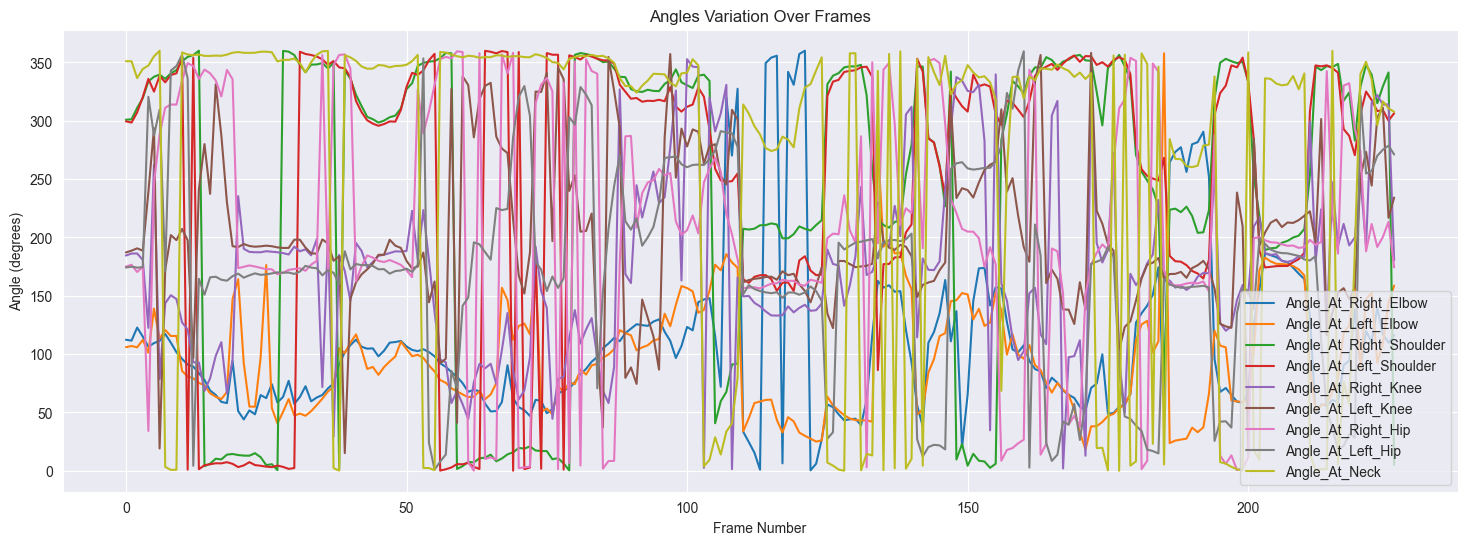

In [68]:
# Set 'Frame_Number' column as the index for easier plotting
Angles_df.set_index('Frame_Number', inplace=False)

# Plot all columns (angles) against the frame number
plt.figure(figsize=(18, 6))  # Adjust figure size as needed
for column in Angles_df.columns:
    if column != 'Frame_Number':
        plt.plot(Angles_df.index, Angles_df[column], label=column)

plt.xlabel('Frame Number')
plt.ylabel('Angle (degrees)')
plt.title('Angles Variation Over Frames')
plt.legend()
plt.grid(True)
plt.show()

In [69]:
Angles_df

,Frame_Number,Angle_At_Right_Elbow,Angle_At_Left_Elbow,Angle_At_Right_Shoulder,Angle_At_Left_Shoulder,Angle_At_Right_Knee,Angle_At_Left_Knee,Angle_At_Right_Hip,Angle_At_Left_Hip,Angle_At_Neck
0,1,112.228097,105.946917,300.824159,299.432987,184.441116,187.085919,174.944262,174.169365,350.952210
1,2,111.508559,106.888412,301.186045,298.390550,186.138609,188.585697,176.493238,174.894198,350.877502
2,3,122.694951,105.806382,310.974083,307.115284,186.205691,190.585809,170.316754,174.080939,336.495308
3,4,115.000636,112.119797,319.233650,320.223157,180.672940,188.610178,174.979710,174.394882,344.299989
4,5,106.251383,101.149346,333.678503,335.817371,122.452475,238.902113,34.093071,320.392733,347.233787
...,...,...,...,...,...,...,...,...,...,...
222,246,110.419488,152.510722,339.332533,317.639719,315.494752,244.399526,211.424646,256.885499,335.198434
223,248,139.734922,92.450494,315.014362,308.222139,321.946559,302.768595,191.754167,269.893425,296.091282
224,249,116.855602,109.071423,329.427421,309.073835,313.681061,311.162952,200.361645,275.133564,316.530203
225,250,109.789651,144.354930,341.292500,300.019344,314.007536,216.727673,213.338021,278.606043,310.640865


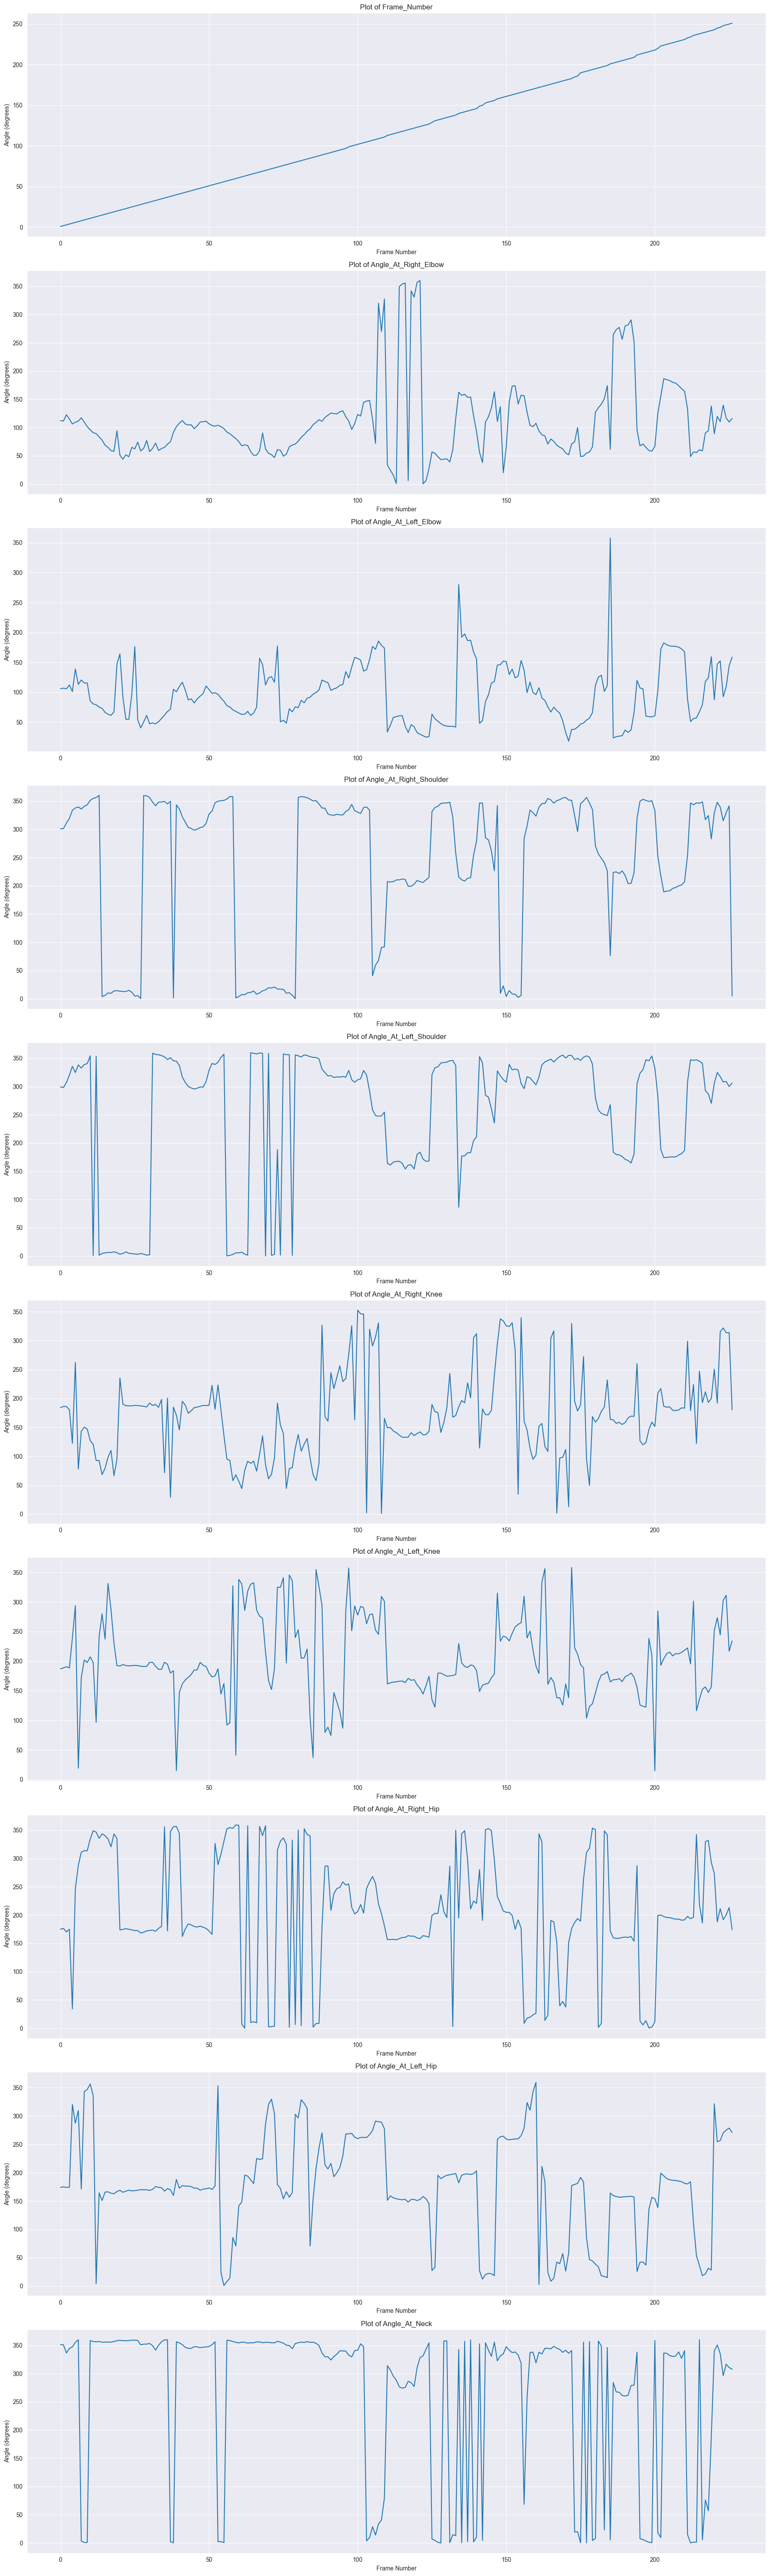

In [70]:
# Set 'Frame_Number' column as the index for easier plotting
Angles_df.set_index('Frame_Number', inplace=False)

# Plot each column (angle) against the frame number in separate subplots
fig, axes = plt.subplots(nrows=len(Angles_df.columns), ncols=1, figsize=(18, 6 * len(Angles_df.columns)))

for i, column in enumerate(Angles_df.columns):
    ax = axes[i] if len(Angles_df.columns) > 1 else axes  # Select the appropriate subplot
    ax.plot(Angles_df.index, Angles_df[column])
    ax.set_xlabel('Frame Number')
    ax.set_ylabel('Angle (degrees)')
    ax.set_title(f'Plot of {column}')
    ax.grid(True)

plt.tight_layout()  # Adjust subplot layout to prevent overlapping
plt.show()

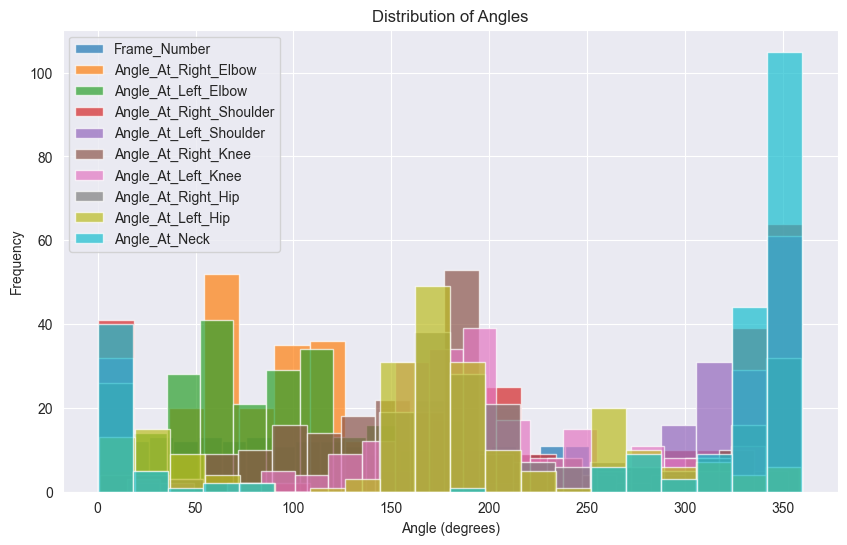

In [71]:
Angles_df.set_index('Frame_Number', inplace=False)

# Plot histograms for each column (angle) against the frame number
plt.figure(figsize=(10, 6))  # Adjust figure size as needed
for column in Angles_df.columns:
    plt.hist(Angles_df[column], bins=20, alpha=0.7, label=column)

plt.xlabel('Angle (degrees)')
plt.ylabel('Frequency')
plt.title('Distribution of Angles')
plt.legend()
plt.grid(True)
plt.show()

##Check for outliers and similarity

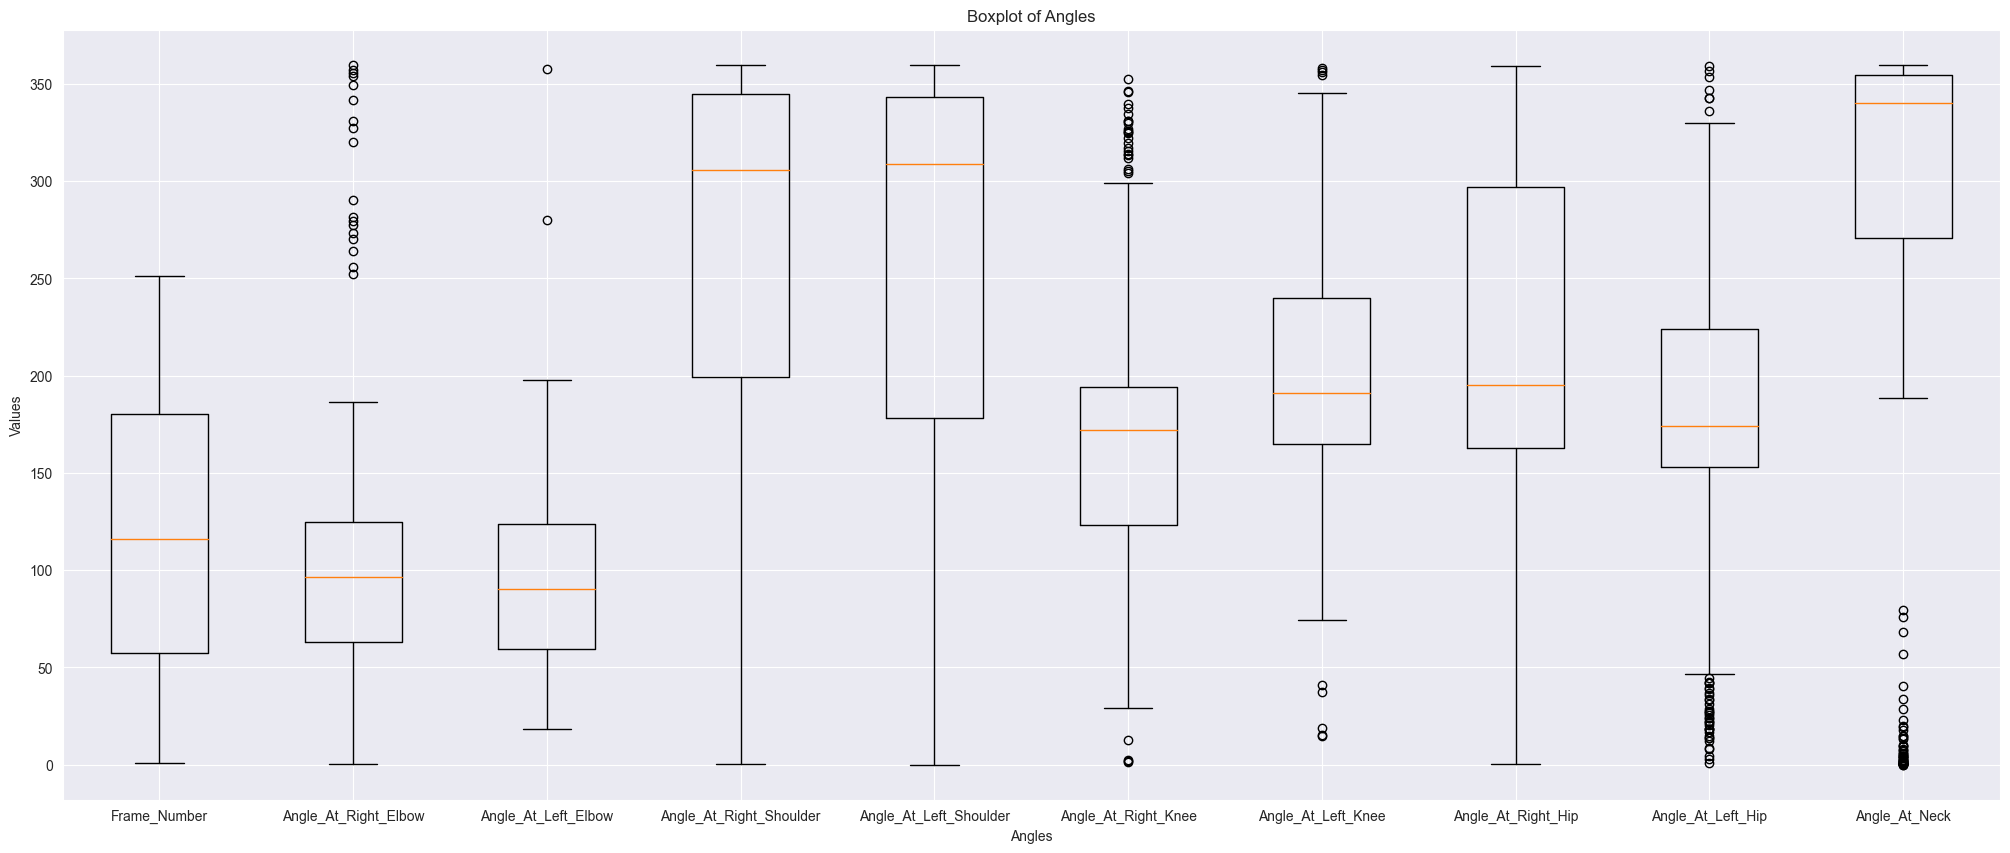

In [72]:
Angles_df.set_index('Frame_Number', inplace=False)

# Plot boxplots for each column (angle) against the frame number
plt.figure(figsize=(25, 10))  # Adjust figure size as needed
plt.boxplot(Angles_df.values, labels=Angles_df.columns)

plt.xlabel('Angles')
plt.ylabel('Values')
plt.title('Boxplot of Angles')
# plt.legend()
plt.grid(True)
plt.show()

##Normalize data

In [73]:
Angles_df

,Frame_Number,Angle_At_Right_Elbow,Angle_At_Left_Elbow,Angle_At_Right_Shoulder,Angle_At_Left_Shoulder,Angle_At_Right_Knee,Angle_At_Left_Knee,Angle_At_Right_Hip,Angle_At_Left_Hip,Angle_At_Neck
0,1,112.228097,105.946917,300.824159,299.432987,184.441116,187.085919,174.944262,174.169365,350.952210
1,2,111.508559,106.888412,301.186045,298.390550,186.138609,188.585697,176.493238,174.894198,350.877502
2,3,122.694951,105.806382,310.974083,307.115284,186.205691,190.585809,170.316754,174.080939,336.495308
3,4,115.000636,112.119797,319.233650,320.223157,180.672940,188.610178,174.979710,174.394882,344.299989
4,5,106.251383,101.149346,333.678503,335.817371,122.452475,238.902113,34.093071,320.392733,347.233787
...,...,...,...,...,...,...,...,...,...,...
222,246,110.419488,152.510722,339.332533,317.639719,315.494752,244.399526,211.424646,256.885499,335.198434
223,248,139.734922,92.450494,315.014362,308.222139,321.946559,302.768595,191.754167,269.893425,296.091282
224,249,116.855602,109.071423,329.427421,309.073835,313.681061,311.162952,200.361645,275.133564,316.530203
225,250,109.789651,144.354930,341.292500,300.019344,314.007536,216.727673,213.338021,278.606043,310.640865


##Save angles data to excel file

In [74]:
file_name = 'angles_data_' + video_name.split('.')[0] + '.xlsx'

Angles_df.to_excel(dataset_path + '/' + file_name, index=False)

print(f"Data saved to {file_name}")

Data saved to angles_data_WPushUp.xlsx
